In [1]:
import salem
from salem.utils import get_demo_file
import xarray as xr
import numpy as np

In [13]:
data_path ='/exports/csce/datastore/geos/users/s1878599/python_code/sample_WRF_chem_out_202.nc'
ds = salem.open_wrf_dataset(data_path)

In [16]:
ds.attrs['pyproj_srs'] = '+proj=merc +lat_ts=30.0 +lon_0=82.0 +x_0=0 +y_0=0 +a=6370000 +b=6370000 '

In [17]:
type(ds.pyproj_srs)

str

In [4]:
shdf = salem.read_shapefile(salem.get_demo_file('world_borders.shp'))

In [5]:
shdf = shdf.loc[shdf['CNTRY_NAME'] == 'India']

In [6]:
dsr = ds.salem.subset(shape=shdf)

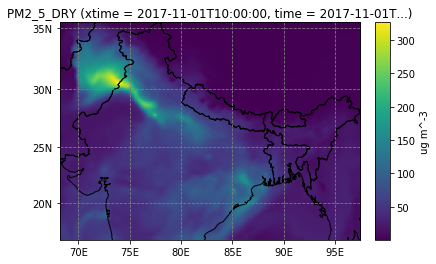

In [7]:
dsr.PM2_5_DRY.isel(time=5, bottom_top=0).salem.quick_map(interp='spline')

In [8]:
dsr2 = dsr.salem.roi(shape=shdf)

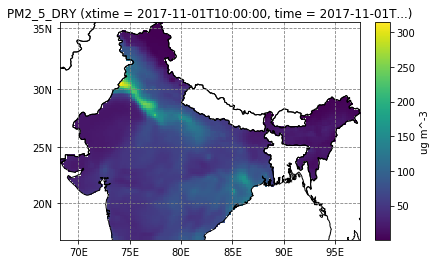

In [9]:
dsr2.PM2_5_DRY.isel(time=5, bottom_top=0).salem.quick_map()

In [16]:
def map_2D(dataset, var_name, level=0, mask_values=None,
           title=None, cmap = 'OrRd', coastline=True, borders=True,
           pixels=False, set_vmax=None, levs=10, save=False, format='pdf', dpi=1000):   
    
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import numpy as np
    
    
    # ------------------------- DRAW THE MAP --------------------------------
    # draw map.
    ax = plt.subplot(projection=ccrs.PlateCarree())
 
    # draw meridians and parallels.
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.ylabel_style = {'size': 10, 'color': 'grey'}


    # draw coastlines and borders.
    if coastline:
        ax.add_feature(cfeature.COASTLINE, lw=0.5)
    if borders:
        ax.add_feature(cfeature.BORDERS, lw=0.5)

   # ------------------------- GET DATA TO PLOT------------------------------
   
    # get variable from dataset.   
    var = dataset[var_name]
      
    # plot data at desired level.
    long = dataset.lon.values
    lat = dataset.lat.values
    
    if mask_values is None:
        var_values = var[level, :, :]
    else: 
        var_values= np.ma.masked_where(var[level,:,:].values < mask_values,
                                       var[level,:,:].values) 
   

   # -------------------------  PLOT DATA ----------------------------------
    
    #setting levels for bar plot.
    
    if not set_vmax is None:  # set vmax in the bar to a fixed costumed value (useful to compare consitently different plots).
        vmax=set_vmax  
    else: 
        import math                # Get the max value in the array to plot, and round to the next hundreds.
        max_val =var.values.max()       
        vmax = int(math.ceil(max_val / 100.0)) * 100
    
    vmin=0
    levels = np.linspace(vmin, vmax, levs)  # number of levels for which divide the bar. Customised. 
                                                  
    #plot type: contourf or pcolormesh.
    
    if pixels:
        cs = plt.pcolormesh(long, lat,var_values,
            transform=ccrs.PlateCarree(), cmap =cmap, levels=levels, vmin=vmin, vmax=vmax)
    else:    
        cs = plt.contourf(long, lat, var_values,
            transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, vmin=vmin, vmax=vmax)
    
    # colorbar.
    cbar = plt.colorbar(cs)
    cbar.set_label(var.units)
    
    #title.
    ax.set_title(title)
    
    #save
    if save:
        plt.savefig( save + '.' + format, format=format, dpi=dpi)
    
    plt.show()

In [13]:
dsr3 = dsr2.mean(dim='time')

/exports/csce/datastore/geos/users/s1878599/miniconda/base/envs/WRFchem/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [14]:
dsr3

<xarray.Dataset>
Dimensions:                (bio_emissions_dimension: 363, bottom_top: 32, klevs_for_dvel: 1, seed_dim: 1, soil_layers: 3, south_north: 102, west_east: 141)
Coordinates:
    lat                    (south_north, west_east) float32 16.689285 ... 35.413086
    lon                    (south_north, west_east) float32 68.290344 ... 97.37143
  * west_east              (west_east) float64 -1.32e+06 -1.3e+06 ... 1.48e+06
  * south_north            (south_north) float64 1.63e+06 1.65e+06 ... 3.65e+06
Dimensions without coordinates: bio_emissions_dimension, bottom_top, klevs_for_dvel, seed_dim, soil_layers
Data variables:
    AOD_OUT                (bottom_top, south_north, west_east) float32 nan ... nan
    AOD2D_OUT              (south_north, west_east) float32 nan nan ... nan nan
    ATOP2D_OUT             (south_north, west_east) float32 nan nan ... nan nan
    ICN_DIAG               (bottom_top, south_north, west_east) float32 nan ... nan
    NC_DIAG                (bottom_to

AttributeError: 'DataArray' object has no attribute 'units'

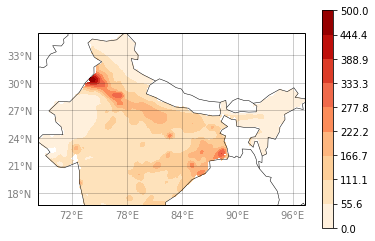

In [18]:
map_2D(dsr3, 'PM2_5_DRY', set_vmax=500)